In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

intrusion_data = pd.read_csv("cybersecurity_intrusion_data.csv", sep=',')

# Varirable Separation 
cols_to_drop = [
    'attack_detected',      
    'session_id' 
]

X = intrusion_data.drop(cols_to_drop, axis=1)
y = intrusion_data['attack_detected']



# Split Train/Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identification of columns type
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

#Pipeline construction

# Standard Scaler
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encoding by  numerotation (Ordinal)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), # Gestion des manquants
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # Encodage 0, 1, 2...
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Application
# Fitting
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Pré-traitement terminé !")
print(f"Nouvelle taille de X_train : {X_train_processed.shape}")


Pré-traitement terminé !
Nouvelle taille de X_train : (7629, 9)


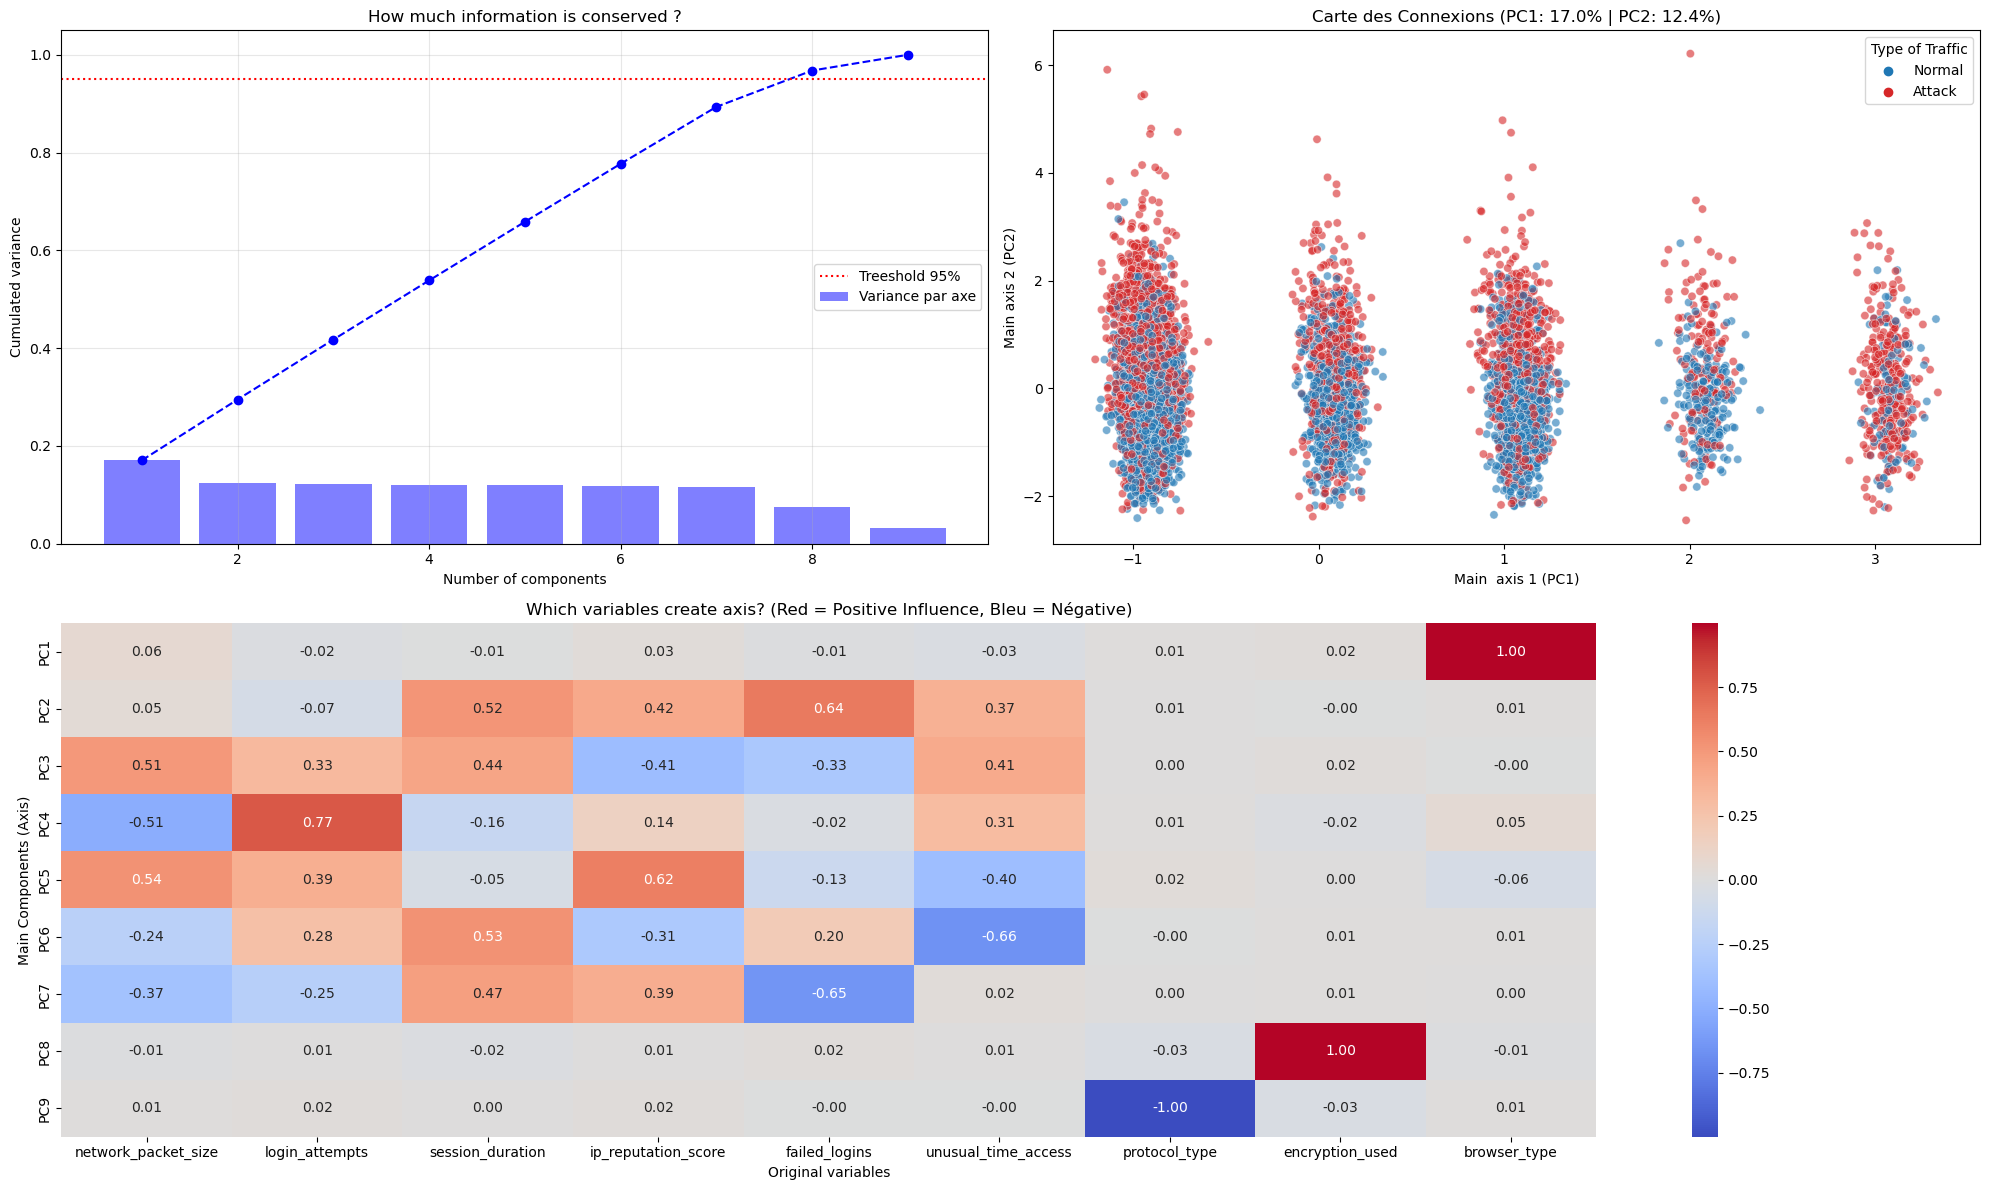

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
feature_names = list(numerical_features) + list(categorical_features)

# ACP
pca = PCA()
X_pca = pca.fit_transform(X_train_processed)

# Variance calculus
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualisation
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2)

# Explained Variance
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='blue')
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, color='blue', label='Variance par axe')
ax1.axhline(y=0.95, color='r', linestyle=':', label='Treeshold 95%')
ax1.set_title('How much information is conserved ?')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Cumulated variance')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Projection 2D
ax2 = fig.add_subplot(gs[0, 1])

pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Target'] = y_train.values

scatter = sns.scatterplot(
    x='PC1', y='PC2', hue='Target', data=pca_df, 
    palette={0: 'tab:blue', 1: 'tab:red'}, alpha=0.6, ax=ax2
)
ax2.set_title(f'Carte des Connexions (PC1: {explained_variance[0]:.1%} | PC2: {explained_variance[1]:.1%})')
ax2.set_xlabel('Main  axis 1 (PC1)')
ax2.set_ylabel('Main axis 2 (PC2)')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, ['Normal', 'Attack'], title="Type of Traffic")

# Matrix of points
ax3 = fig.add_subplot(gs[1, :]) # Prend toute la largeur du bas

loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(X_train_processed.shape[1])],
    index=feature_names
)
# Heatmap
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=ax3)
ax3.set_title("Which variables create axis? (Red = Positive Influence, Bleu = Négative)")
ax3.set_ylabel("Main Components (Axis)")
ax3.set_xlabel("Original variables")

plt.tight_layout()
plt.show()

Nouvelle taille de X_train : (7629, 5)


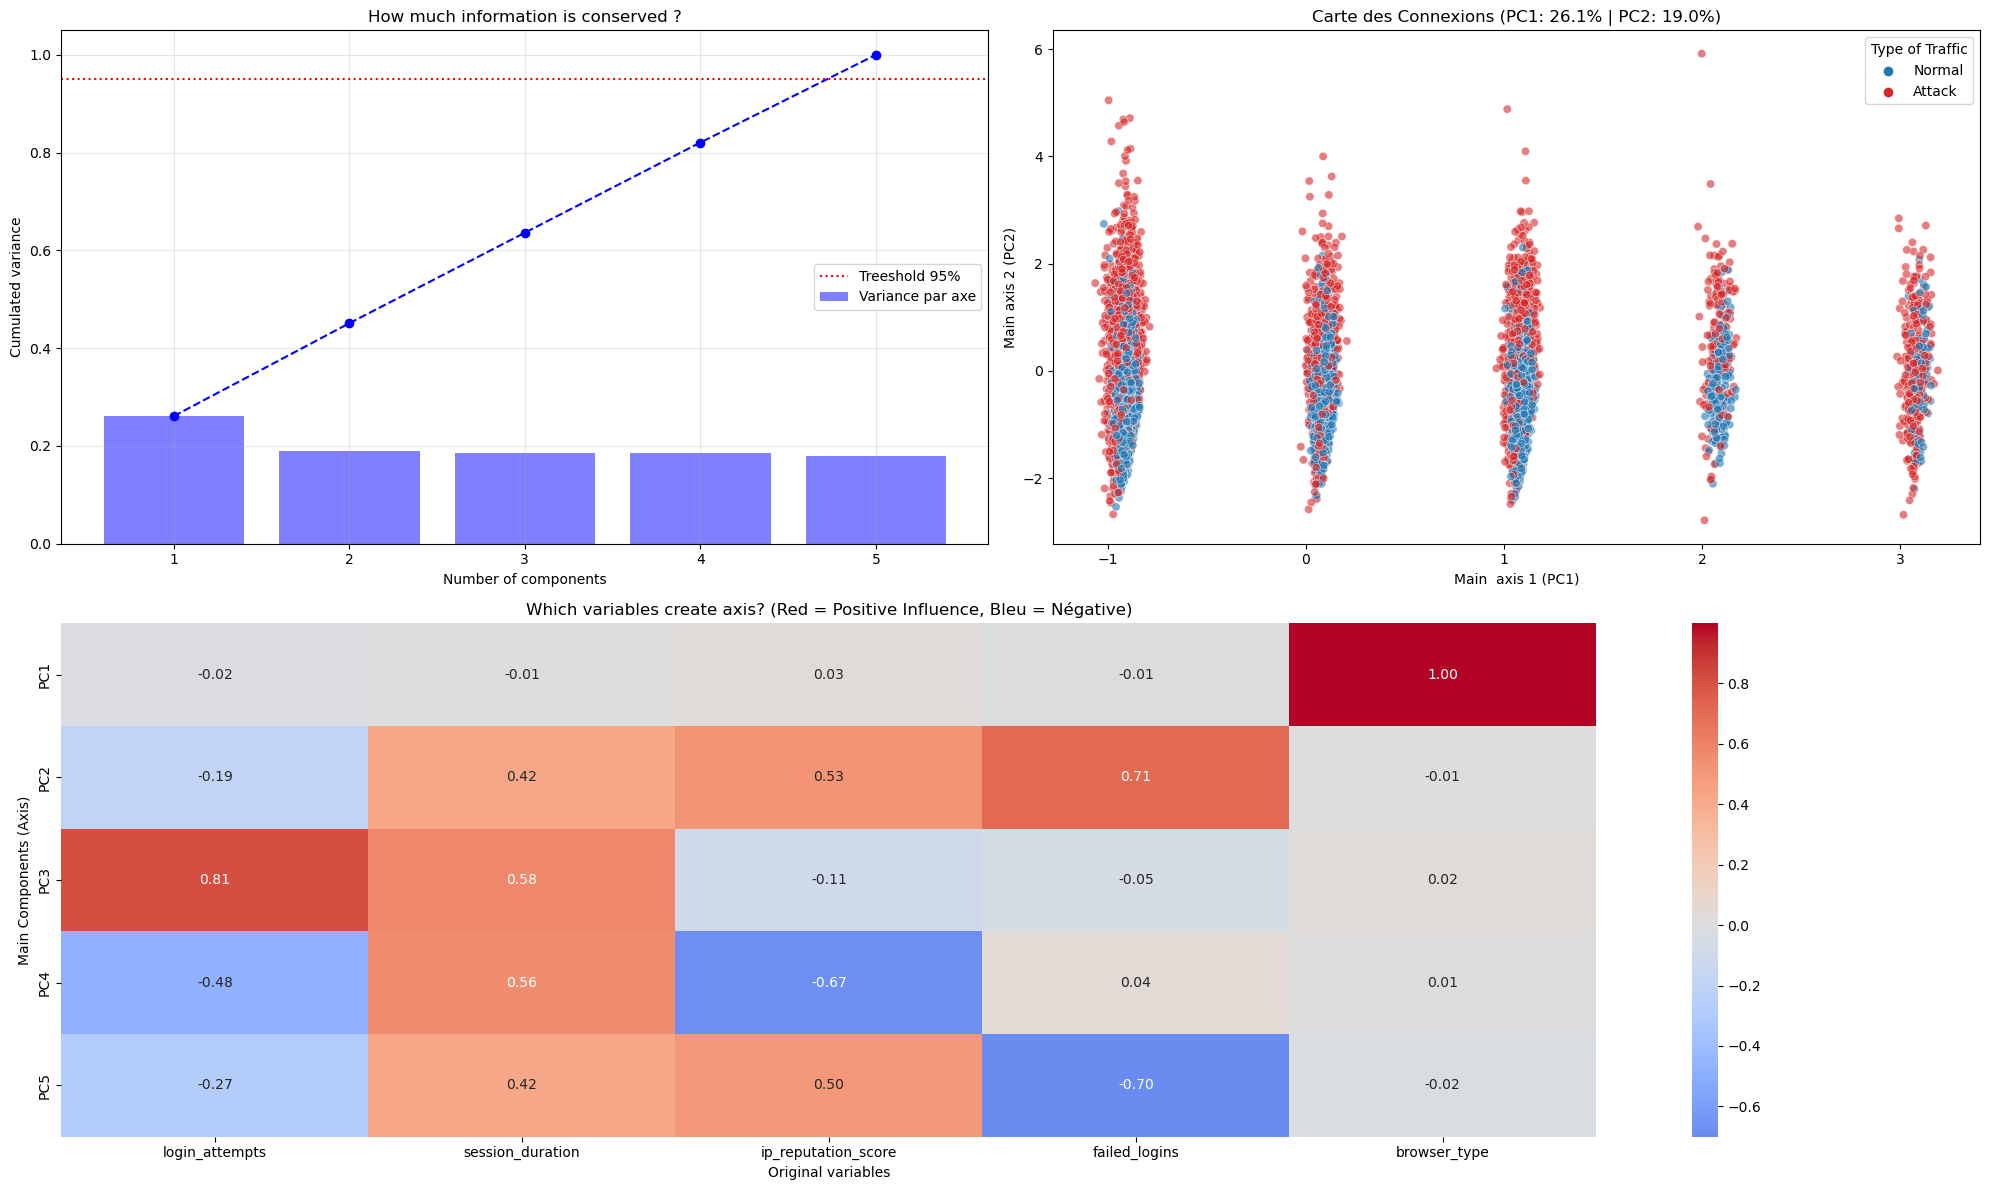

In [11]:
# Same code but with less column of the dataset

intrusion_data = pd.read_csv("cybersecurity_intrusion_data.csv", sep=',')


# Deleting columns
cols_to_drop = [
    'attack_detected',      
    'session_id',           
    'protocol_type',       
    'unusual_time_access',  
    'encryption_used',     
    'network_packet_size'   
]

X = intrusion_data.drop(cols_to_drop, axis=1)
y = intrusion_data['attack_detected']



# Split Train/Test 
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identification of columns types
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Pipeline construction 

# Standard Scaler 
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Numerotation (Ordinal)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), # Gestion des manquants
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # Encodage 0, 1, 2...
])


preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Application
# Fitting
X_train_processed_reduced = preprocessor_reduced.fit_transform(X_train_reduced)  
X_test_processed_reduced = preprocessor_reduced.transform(X_test_reduced)

print(f"Nouvelle taille de X_train : {X_train_processed_reduced.shape}")

feature_names = list(numerical_features) + list(categorical_features)

# ACP
pca = PCA()
X_pca = pca.fit_transform(X_train_processed_reduced)

# Variance Calculus
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualisation
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2)

# Explained Variance
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='blue')
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, color='blue', label='Variance par axe')
ax1.axhline(y=0.95, color='r', linestyle=':', label='Treeshold 95%')
ax1.set_title('How much information is conserved ?')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Cumulated variance')
ax1.legend()
ax1.grid(True, alpha=0.3)

#Projection 2D 
ax2 = fig.add_subplot(gs[0, 1])

pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Target'] = y_train_reduced.values

scatter = sns.scatterplot(
    x='PC1', y='PC2', hue='Target', data=pca_df, 
    palette={0: 'tab:blue', 1: 'tab:red'}, alpha=0.6, ax=ax2
)
ax2.set_title(f'Carte des Connexions (PC1: {explained_variance[0]:.1%} | PC2: {explained_variance[1]:.1%})')
ax2.set_xlabel('Main  axis 1 (PC1)')
ax2.set_ylabel('Main axis 2 (PC2)')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, ['Normal', 'Attack'], title="Type of Traffic")

# Matrix of points
ax3 = fig.add_subplot(gs[1, :]) 

loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(X_train_processed_reduced.shape[1])],
    index=feature_names
)
# Heatmap
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=ax3)
ax3.set_title("Which variables create axis? (Red = Positive Influence, Bleu = Négative)")
ax3.set_ylabel("Main Components (Axis)")
ax3.set_xlabel("Original variables")

plt.tight_layout()
plt.show()

## Analysis of PCA on Reduced dataset
The variance is distributed almost evenly across the 5 remaining components (approx. 20-25% each). This is unusual and indicates that there is no single "dominant" feature. All retained variables contribute equally to the dataset's structure, implying that the information is dense and cannot be easily compressed further without loss.

For the projection, we are only choosing PC1 and PC2 because they are the one with the best cumulated variance. So, the projection exhibits a distinct "barcode" or vertical striping pattern. This is an artifact of the Ordinal Encoding applied to the categorical feature (likely browser_type), creating discrete columns at x = -1, 0, 1, etc. Within these vertical bands, the "Normal" (blue) and "Attack" (red) points are heavily overlapped. There is no clear linear boundary separating the two classes. However, we observe that the red points (attacks) tend to reach higher extremes on the Y-axis (PC2), suggesting that attacks are characterized by extreme values in behavioral features (like session_duration or failed_logins).

## Analysis of PCA on Full dataset (except the session_id column) 
The complexity is significantly higher here. It takes about 8 out of 9 components to explain 95% of the variance. This fragmentation confirms that every feature in the original dataset carries unique, non-redundant information.
PC1 is almost entirely driven by browser_type (correlation of 1.00).PC2 captures behavioral anomalies (failed_logins, session_duration).
Similar to the reduced dataset, we see the "barcode" effect driven by the browser type on PC1. The separation remains non-linear: attacks are hidden inside the traffic of each browser type, distinguishable mainly by their vertical spread .

## Comparison of the two 
Comparing the two results highlights the risks of manual feature selection. In the Reduced Dataset, the PCA showed a simplified structure, but the Full Dataset PCA revealed that the variables we removed (protocol_type, encryption_used) actually constituted independent axes of variance (PC8 and PC9). By removing them, we were effectively discarding entire dimensions of the problem, potentially blinding the model to specific attack vectors relying on protocols or encryption types.

## Conclusion 
The visualization of the Full Dataset demonstrates that the problem is highly non-linear. A simple line cannot separate the blue and red points clustered within the vertical bands.The fragmented variance proves that every column is necessary to capture the full picture of network traffic.
The strong overlap of classes confirms that linear models (like the baseline Logistic Regression) will underperform. The visual evidence strongly supports the move to non-linear algorithms like Random Forest (which can isolate the specific "bands")


Best Parameters (Full): {'classifier__C': 0.01, 'classifier__penalty': 'l1'}

CLASSIFICATION REPORT (FULL):
              precision    recall  f1-score   support

      Normal       0.74      0.77      0.75      1055
      Attack       0.70      0.66      0.68       853

    accuracy                           0.72      1908
   macro avg       0.72      0.71      0.72      1908
weighted avg       0.72      0.72      0.72      1908

AUC-ROC Score : 0.7789

Best Parameters (Reduced): {'classifier__C': 0.01, 'classifier__penalty': 'l1'}

CLASSIFICATION REPORT (REDUCED):
              precision    recall  f1-score   support

      Normal       0.74      0.77      0.75      1055
      Attack       0.70      0.66      0.68       853

    accuracy                           0.72      1908
   macro avg       0.72      0.72      0.72      1908
weighted avg       0.72      0.72      0.72      1908

AUC-ROC Score : 0.7792


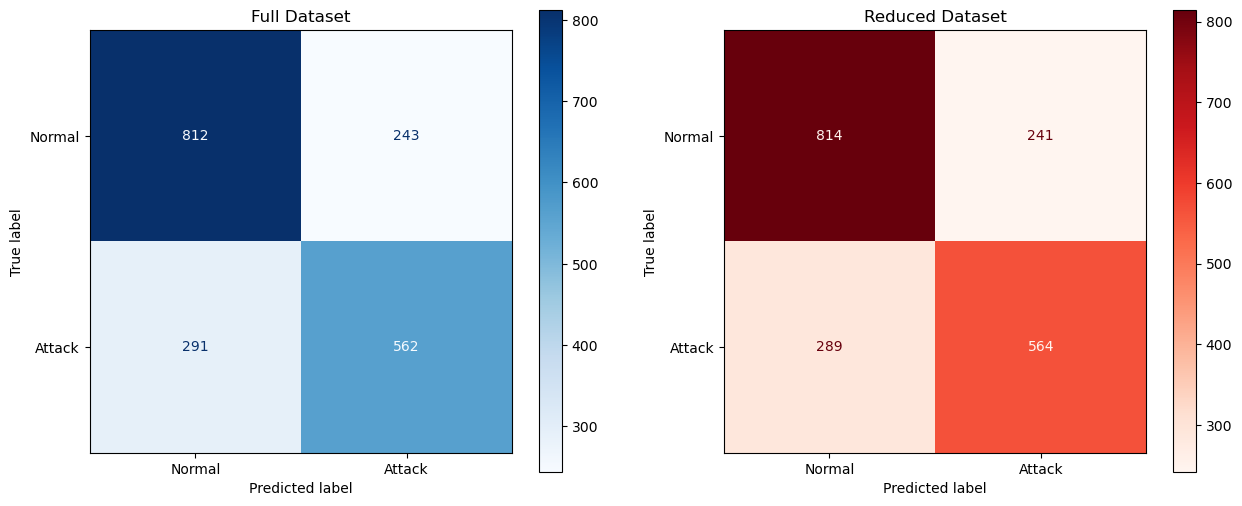

In [17]:
## Pipeline
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
# Full model 
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor), # Utilise le preprocessor complet
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))
])

grid_search = GridSearchCV(pipeline_lr, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model_full = grid_search.best_estimator_ # Je renomme pour pas écraser la variable
y_pred = best_model_full.predict(X_test)
y_proba = best_model_full.predict_proba(X_test)[:, 1]

# Reduced model 
pipeline_lr_reduced = Pipeline([
    ('preprocessor', preprocessor_reduced), # <--- ATTENTION : Utiliser le preprocessor réduit
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))
])

grid_search_reduced = GridSearchCV(pipeline_lr_reduced, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search_reduced.fit(X_train_reduced, y_train_reduced)

best_model_reduced = grid_search_reduced.best_estimator_
y_pred_reduced = best_model_reduced.predict(X_test_reduced)
y_proba_reduced = best_model_reduced.predict_proba(X_test_reduced)[:, 1]

#Classification reports 
print(f"\nBest Parameters (Full): {grid_search.best_params_}")
print("\nCLASSIFICATION REPORT (FULL):")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test, y_proba):.4f}")

print(f"\nBest Parameters (Reduced): {grid_search_reduced.best_params_}")
print("\nCLASSIFICATION REPORT (REDUCED):")
print(classification_report(y_test_reduced, y_pred_reduced, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test_reduced, y_proba_reduced):.4f}")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Normal', 'Attack'], cmap='Blues', ax=axes[0])
axes[0].set_title("Full Dataset")

ConfusionMatrixDisplay.from_predictions(y_test_reduced, y_pred_reduced, display_labels=['Normal', 'Attack'], cmap='Reds', ax=axes[1])
axes[1].set_title("Reduced Dataset")

plt.show()


Best Parameters (Full): {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
RAPPORT CLASSIFICATION (KNN FULL):
              precision    recall  f1-score   support

      Normal       0.79      0.95      0.86      1055
      Attack       0.92      0.69      0.79       853

    accuracy                           0.83      1908
   macro avg       0.85      0.82      0.83      1908
weighted avg       0.85      0.83      0.83      1908

AUC-ROC Score : 0.8595

Best Parameters (Reduced): {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
RAPPORT CLASSIFICATION (KNN REDUCED):
              precision    recall  f1-score   support

      Normal       0.81      0.88      0.85      1055
      Attack       0.84      0.75      0.79       853

    accuracy                           0.82      1908
   macro avg       0.83      0.82      0.82      1908
weighted avg       0.82      0.82      0.82      1

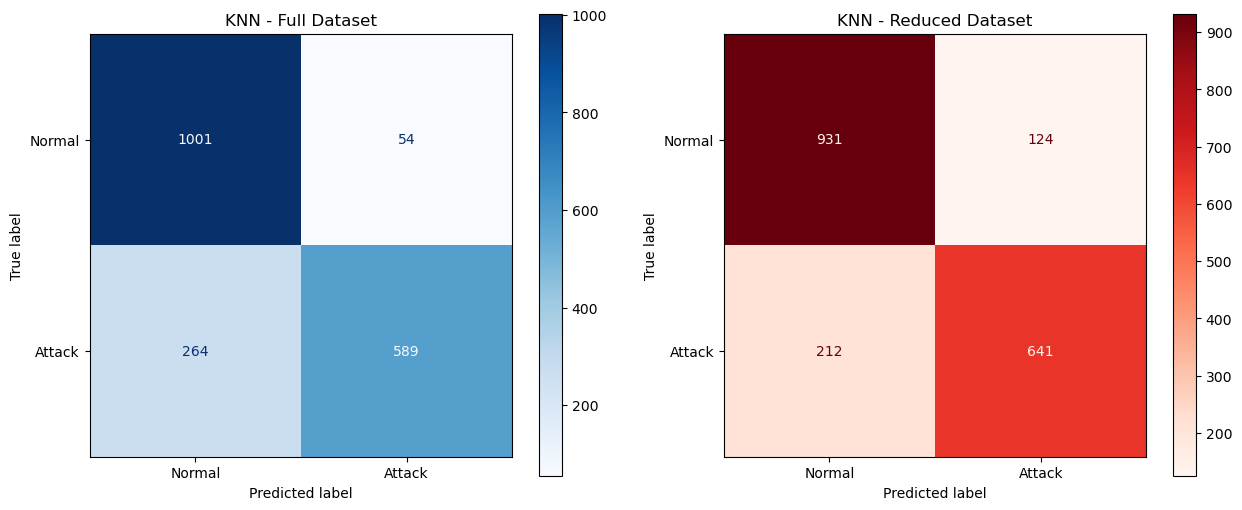

In [18]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# HyperParameters Grid
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11], 
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan'] 
}

#Full dataSet
pipeline_knn_full = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', KNeighborsClassifier())
])

grid_search_knn_full = GridSearchCV(pipeline_knn_full, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_search_knn_full.fit(X_train, y_train)

best_model_knn_full = grid_search_knn_full.best_estimator_
y_pred_full = best_model_knn_full.predict(X_test)
y_proba_full = best_model_knn_full.predict_proba(X_test)[:, 1]


#Reduced dataset 
pipeline_knn_reduced = Pipeline([
    ('preprocessor', preprocessor_reduced),
    ('classifier', KNeighborsClassifier())
])

grid_search_knn_reduced = GridSearchCV(pipeline_knn_reduced, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_search_knn_reduced.fit(X_train_reduced, y_train_reduced)

best_model_knn_reduced = grid_search_knn_reduced.best_estimator_
y_pred_reduced = best_model_knn_reduced.predict(X_test_reduced)
y_proba_reduced = best_model_knn_reduced.predict_proba(X_test_reduced)[:, 1]

# Results
print(f"\nBest Parameters (Full): {grid_search_knn_full.best_params_}")
print("RAPPORT CLASSIFICATION (KNN FULL):")
print(classification_report(y_test, y_pred_full, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test, y_proba_full):.4f}")

print(f"\nBest Parameters (Reduced): {grid_search_knn_reduced.best_params_}")
print("RAPPORT CLASSIFICATION (KNN REDUCED):")
print(classification_report(y_test_reduced, y_pred_reduced, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test_reduced, y_proba_reduced):.4f}")

# Matrices de Confusion
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_full, display_labels=['Normal', 'Attack'], cmap='Blues', ax=axes[0])
axes[0].set_title("KNN - Full Dataset")

ConfusionMatrixDisplay.from_predictions(y_test_reduced, y_pred_reduced, display_labels=['Normal', 'Attack'], cmap='Reds', ax=axes[1])
axes[1].set_title("KNN - Reduced Dataset")

plt.show()